<a href="https://colab.research.google.com/github/aebongbing/ESAA/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_CH4_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 선형 회귀

선형 모델

- 입력 특성의 가중치 합과 편향이라는 상수를 더해 예측을 만든다

모델 훈련

- 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것

- 선형 회귀 모델을 훈련시키려면 MSE를 최소화하는 세타를 찾아야


# 4.1.1 정규방정식

정규방정식

- 비용함수를 최소화하는 세타값을 찾기 위한 해석적인 방법


In [1]:
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

- 선형처럼 보이는 데이터 생성

In [2]:
X_b = np.c_[np.ones((100,1)), X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

- 정규방정식을 사용해 theta hat 계산
- np.linalg.inv() 함수를 통해 역행렬 계산
- dot() 매서드를 사용해 행렬 곱셈

In [3]:
theta_best

array([[4.10603685],
       [2.72507327]])

- 정규 방정식으로 계산한 값 확인
- 매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못함

In [4]:
X_new=np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[4.10603685],
       [9.55618339]])

- theta hat을 사용하여 예측

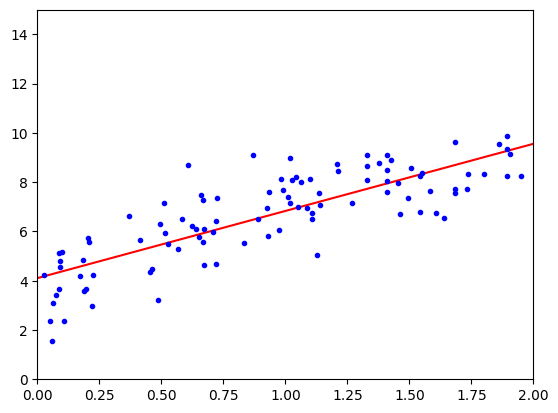

In [5]:
import matplotlib.pyplot as plt
plt.plot (X_new, y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

사이킷런에서 선형 회귀 수행

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.10603685]), array([[2.72507327]]))

In [7]:
lin_reg.predict(X_new)

array([[4.10603685],
       [9.55618339]])

In [8]:
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.10603685],
       [2.72507327]])

- LinearRegression 클래스는 spicy.linalg.lstsq() 함수를 기반으로

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.10603685],
       [2.72507327]])

- 이 함수는 theta hat= (X)+y 계산
- (X)+는 X의 유사 역행렬 -> np.linalg.pinv()함수를 사용해 직접 구할 수 있다

유사 역행렬

- 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산
  
  - X=U * sigma * V.T 로 분해
  - X+=V * (sigma)+ * U.T로 계산
  - 실제로 m<n 이거나 어떤 특성이 중복되어 행렬 X.T*X 의 역행렬이 없다면 정규방정식은 작동하지 않는다
  - 유사역행렬은 하상 구할 수 있다


# 4.1.2 계산 복잡도

정규 방정식은 (n+1)x(n+1) 크기가 되는 X.T*X 의 역행렬을 계산한다.

-> 역행렬을 계산하는 계산 복잡도는 일반적으로 O(n^2.4) ~ O(n^3) 사이이다.

- 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 O(n^2) 이다.


# 4.2 경사 하강법

경사 하강법(GD)

- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘

- 기본 아이디어: 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정하는 것

- 무작위 초기화: theta를 임의의 값으로 시작


학습률

- 경사 하강법에서 중요한 파라미터로 스텝의 크기
- 너무 작으면 반복을 많이 해야 해서 시간이 오래 걸림
- 너무 크면 이전보다 높은 곳으로 올라갈 수도

경사하강법의 두 가지 문제점

1. 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴
2. 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다

선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 그어도 곡선을 가로지르지 않는 볼록함수이다.

- 이는 지역최속값이 없고 하나의 전역 최솟값만 있다는 뜻
- 또한 연속된 함수, 기울기가 갑자기 변하지 않음

-> 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장

- 스케일에 따라 모양과 시간이 달라짐


# 4.2.1 배치 경사 하강법

편도함수

- 경사하강법을 구현하려면 각 모델 파라미터 theta(j)에 대해 비용 함수의 그레디언트를 계산해야 한다
- 다시 말해, theta(j)가 조금 변경될 때 비용함수가 얼마나 바뀌는 지 계산해야 한다


In [11]:
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta=eta*gradients

In [12]:
theta

array([[-2.2154417 ],
       [-2.37982909]])

적절한 학습률을 찾으려면 그리드 참색을 사용

-> 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한 해야함

반복 횟수 지정 방법

-> 반복 횟수를 아주 크게 지정하고 크레디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 허용오차보다 작아지면 경사 하겅법이 최솟값에 도달한 것이므로 알고리즘 중지


# 4.2.2 확률적 경사 하강법

배치 경사 하강법의 가장 큰 문제

- 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계싼
- 훈련 세트가 커지면 매우 느려진다

확률적 경사 하강법

- 매 스텝에서 한 개의 샘플을 무작위로 선택
- 그 하나의 샘플에 대한 그레이디언트를 계산
- 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠르다
- 매우 큰 훈련 세트도 훈련시킬 수 있다 (매 반복에서 하나의 샘플만 메모리에 있으면 되므로)
- 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정 -> 요동치며 평균족으로 감소
- 비용 함수가 불규칙할 경우-> 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높다
- 무작위성
- 학습 스케쥴
  - 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘은 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않다
  - 해결 방법: 학습률을 점진적으로 감소 -> 담금질 기법알고리즘과 유사
  - 매 반복에서 학습률을 결정하는 함수
  - 너무 빨리 줄어들면 지역 최솟값에 갇히거나 중간에 멈춰버릴 수 있다
  - 너무 천천히 줄어들면 오랫동안 주변을 맴돌거나 훈련을 너무 일찍 중지할 수 있다

In [13]:
n_epochs=50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0/(t+t1)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    xi=X_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta=theta-eta*gradients

- 학습 스케쥴 사용한 확률적 경사 하강법의 구현
- 일반적으로 한 반복에서 m번 되풀이 되고 이때 각 반복으로 에포크라고 한다


In [14]:
theta

array([[4.08779375],
       [2.67922962]])

샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있다

-> 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 ㄷ음 에포크에서 다시 섞는 식의 방법을 사용할 수 있다

-> 그러나 이렇게 하면 보통 더 늦게 수렴한다

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)  # max_iter : 최대 에포크 횟수. tol : 손실이 줄어들 때까지 실행되는 기준. eta0 : 학습률. penalty : 규제
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.11707703]), array([2.74879639]))

- 정규방정식으로 구한 것과 매우 비슷한 값을 얻음


# 4.2.3 미니배치 경사 하강법

각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그레이디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산한다.

- 주요 장점 : 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상

- 미니배치를 어느 정도 크게 하면 SGD보다 덜 불규칙하게 움직인다. -> 지역 최솟값에서 빠져나오기는 더 힘들수도 있다.

세 가지 경사 하강법 알고리즘 훈련 과정동안 파라미터 공간에서 움직인 경로

- 모두 최솟값 근처에 도달
- 배치 경사 하강법 -> 실제로 최솟값에서 멈춤, 시간이 많이 걸림
- 확률적/미니배치 경사 하강법 -> 근처에서 맴돌고 있음, 적절한 학습 스케쥴 사용


# 4.3 다항 회귀

다항 회귀

- 비선형 데이터를 학습하는데 선형 모델을 사용
- 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시티는 것

In [17]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X+X+2+np.random.randn(m,1)

- 2차방정식으로 잡음이 포함된 비선형 데이터 생성

-> 직선은 이 데이터에 잘 맞지 않음

-> 사이킷런의 PolynimialFeatures를 사용해 훈련 데이터를 변환

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([-1.76903724])

- 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가

In [19]:
X_poly[0]

array([-1.76903724,  3.12949277])

In [20]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.96827732]), array([[ 1.55952539, -0.005687  ]]))

- 확장된 훈련 데이터에 linearregression 적용

측성이 여러 개 일때 다항 회귀는 이 특서 사이의 관곌 찾는다

- PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가한다


# 4.4 학습곡선

고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다

- 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합
- 선형 모델은 과소적합

모델이 데이터에 과대적합/과소적합 되었는지 아는 방법

1. 교차 검증 사용

- 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 과대적합된 것 (복잡하다)

2. 학습 곡선을 살펴보는 것

- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸다

- 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련 시키면 된다

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)
  train_errors, val_errors=[],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict=model.predict(X_train[:m])
    y_val_predict=model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="훈련 세트")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3, label="검증 세트")

- 훈련 데이터에서 학습 곡선을 그리는 함수 정의


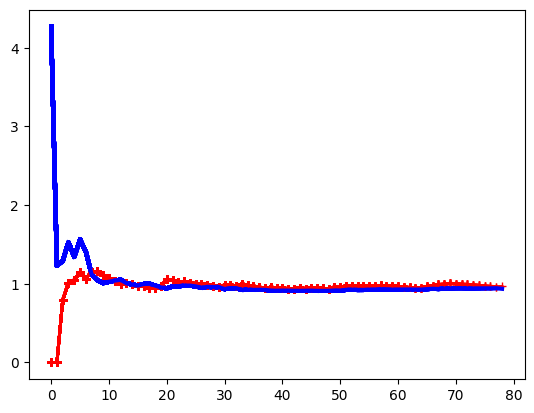

In [22]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X, y)

- 단순 선형 회귀 모델의 학습 곡선

1. 훈련 데이터의 성능
- 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두개의 샘플이 있을땐 모델이 완벽하게 작동
- 하지만 훈련 세트에 샘플이 추가됨에 따라 답음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는ㄱ 서은 불가능

2. 검증 데이터에 대한 모델의 성능 0 모댈이 적은 수의 샘플로 훈련될 때는 제대로 일반화x
-> 검증 오차가 초기에 매우 크다
- 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다

과소적합 모델= 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접

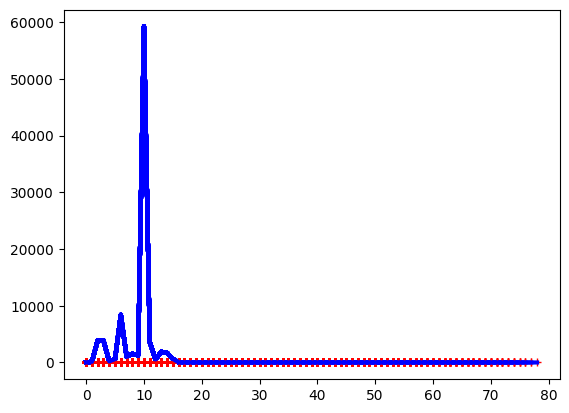

In [23]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

- 10차 다항 최귀 모델의 학습 곡선

중요한 차이점

1. 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다
2. 두 곡선 사이에 공간이 있다 -> 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고 이는 과대적합 모델의 특징

편향/ 분산 트레이드 오프

모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다

1. 편향
2. 분산
3. 줄일 수 없는 오차

모델의 복잡도가 커지면 분산이 커지고 편향이 줄어든다

반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다

# 4.5 규제가 있는 선형 모델

과대 적합을 감소시키는 조은 방법: 모델 규제

## 4.5.1 릿지 회귀

- 규제가 추가된 선형 회귀 버전
- 규제항이 비용 함수에 추가
- 학습 알고리즘을 데이터에 맞추는 것뿐만이 아니라 모델의 가중치가 가능한 작게 유지되도록 노력
- 규제항: 훈련하는 동안에만 비용 함수 추가
- 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가

하이퍼파라미터 알파

- 모델을 얼마나 규제할 지 조절
- 0이면 릿지 회귀는 선형 회귀와 같아진다
- 알파가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다


릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사 하강법을 사용할 수도 있다


In [25]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.28449757]])

In [27]:
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.24091601])

# 라쏘 회귀

- 선형 회귀의 또 다른 규제된 버전
- 릿지 회귀처럼 비용 함수에 규제항을 더하지만, 가중치 벡터의 l1노름을 사용

라쏘 회귀의 중요한 특징: 덜 중요한 특성의 가중치를 제거하려고 한다는 점 (즉, 가중치가 0이 된다)

-> 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만든다

- 라쏘와 다른 점

1. 첫째 파라미터가 전역 최적점에 가까워질수록 그레이디언트가 작이진다
-> 경사 하강법이 자동으로 느려지고 수렴에 도움이 된다

2. 알파를 증가시킬수록 최적의 파라미터가 원점에 더 가까워진다. 하지만 완전히 0이 되지는 않는다

- 라쏘를 사용할 때 경사 하강법이 최적점 근처헤서 진동하는 것을 막으려면 훈련하는 동안 점진적으로 학습률을 감소시켜야 한다

In [28]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.24177216])

# 4.5.3 엘라스틱넷

- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며 혼합 저도는 혼합 비율 r을 사용하여 조절

보통의 선형회귀, 릿지, 라쏘, 엘라스틱넷을 언제 사용해야 할까?

- 규제가 약간 있는 것이 대부분의 경우에 좋기 때문에 일반적으로 평범한 선형 회귀는 피할 것
- 릿지가 기본이 되지만 쓰이는 특성이 몇 개 뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇개가 강헥 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 엘라스틱넷을 선호한다


In [29]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.22859734])

# 4.5.4 조기 종료

- 경사 하강법과 같은 반볻적인 학습 알고리즘을 규제하는 아주 색다른 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것
- 에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측에러(RMSE)와 검증 세트에 대한 예측 에러 줄어든다
- 그러나 다시 상승한다 -> 모델이 훈련 데이터에 과대적합하기 시작하는 것의 의미

조기종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는

In [30]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel())   # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

# 4.6 로지스틱 회귀

- 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용
- 이진 분류기

## 4.6.1 확률 추정

- 로지스틱 회귀 모델은 선형 회귀 모델과 같이 입력 특서의 가중치합을 구하고 편향을 더한다
- 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력한다


로지스틱 회귀 모델이 샘플 x가 양성 클래스에 속할 확률 phat=h(x)를 추정하면 이에 대한 예측 yhat을 쉽게 구할 수 있다

## 4.6.2 훈련과 비용 함수

훈련의 목적 : 양성 샘플(y=1)에 대해서는 옾은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 theta를 찾는 것

- 비용 함수는 t가 0과 1에 가까워지면 -log(t)와 -log(1-t)가 매우 커지므로 타당하다 할 수 있다.
- 따라서 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워진다.

- 로그 손실: 전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것

In [31]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [32]:
X=iris['data'][:, 3:]
y=(iris['target']==2).astype(int)

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

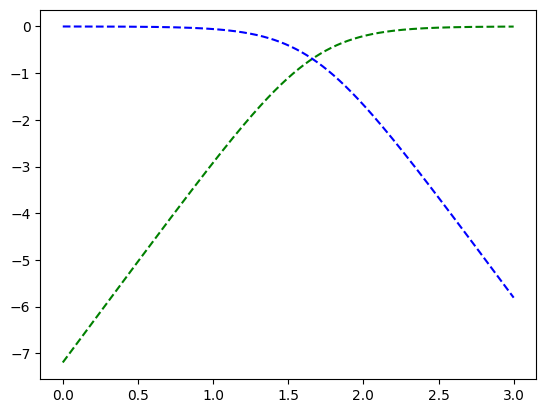

In [34]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_log_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g--",label="Iris virginica")
plt.plot(X_new, y_proba[:,0],"b--",label="Not virginica")

In [35]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## 4.6.4 소프트맥스 회귀

소프트맥스 회귀, 다항 로지스틱 회귀

- 로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있다
- 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 계산 -> 소프트맥스 함수 적용 -> 각 클래스의 확률 추정

훈련 방법

- 모델이 타깃 클래스에 대해서 높은 확률을 추정하도록 만드는 것이 목적

- 크로스 엔트로피 비용 함수를 최소화 하는 것 : 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합하다.

사이킷런의 LogisticRegression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA) 전략 사용

multi_class 매개변수를 "multinomial"로 바꾸면 소프트맥스 회귀 사용 가능

- solver 매개변수에 "lbfgs"와 같이 소프트맥스 회귀 지원하는 알고리즘 지정해야한다.
- 기본적으로 하이퍼파라미터 C 사용하여 조절할 수 있는 l2 규제 적용

In [36]:
X=iris["data"][:, (2,3)]
y=iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [37]:
softmax_reg.predict([[5,2]])

array([2])

In [38]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])